<a href="https://colab.research.google.com/github/oluwamark/compx310/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/15Zx5bY0TK5YD74MDEiE-KrqBWZRNZS88?usp=sharing

## Preparing the environment, loading data

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


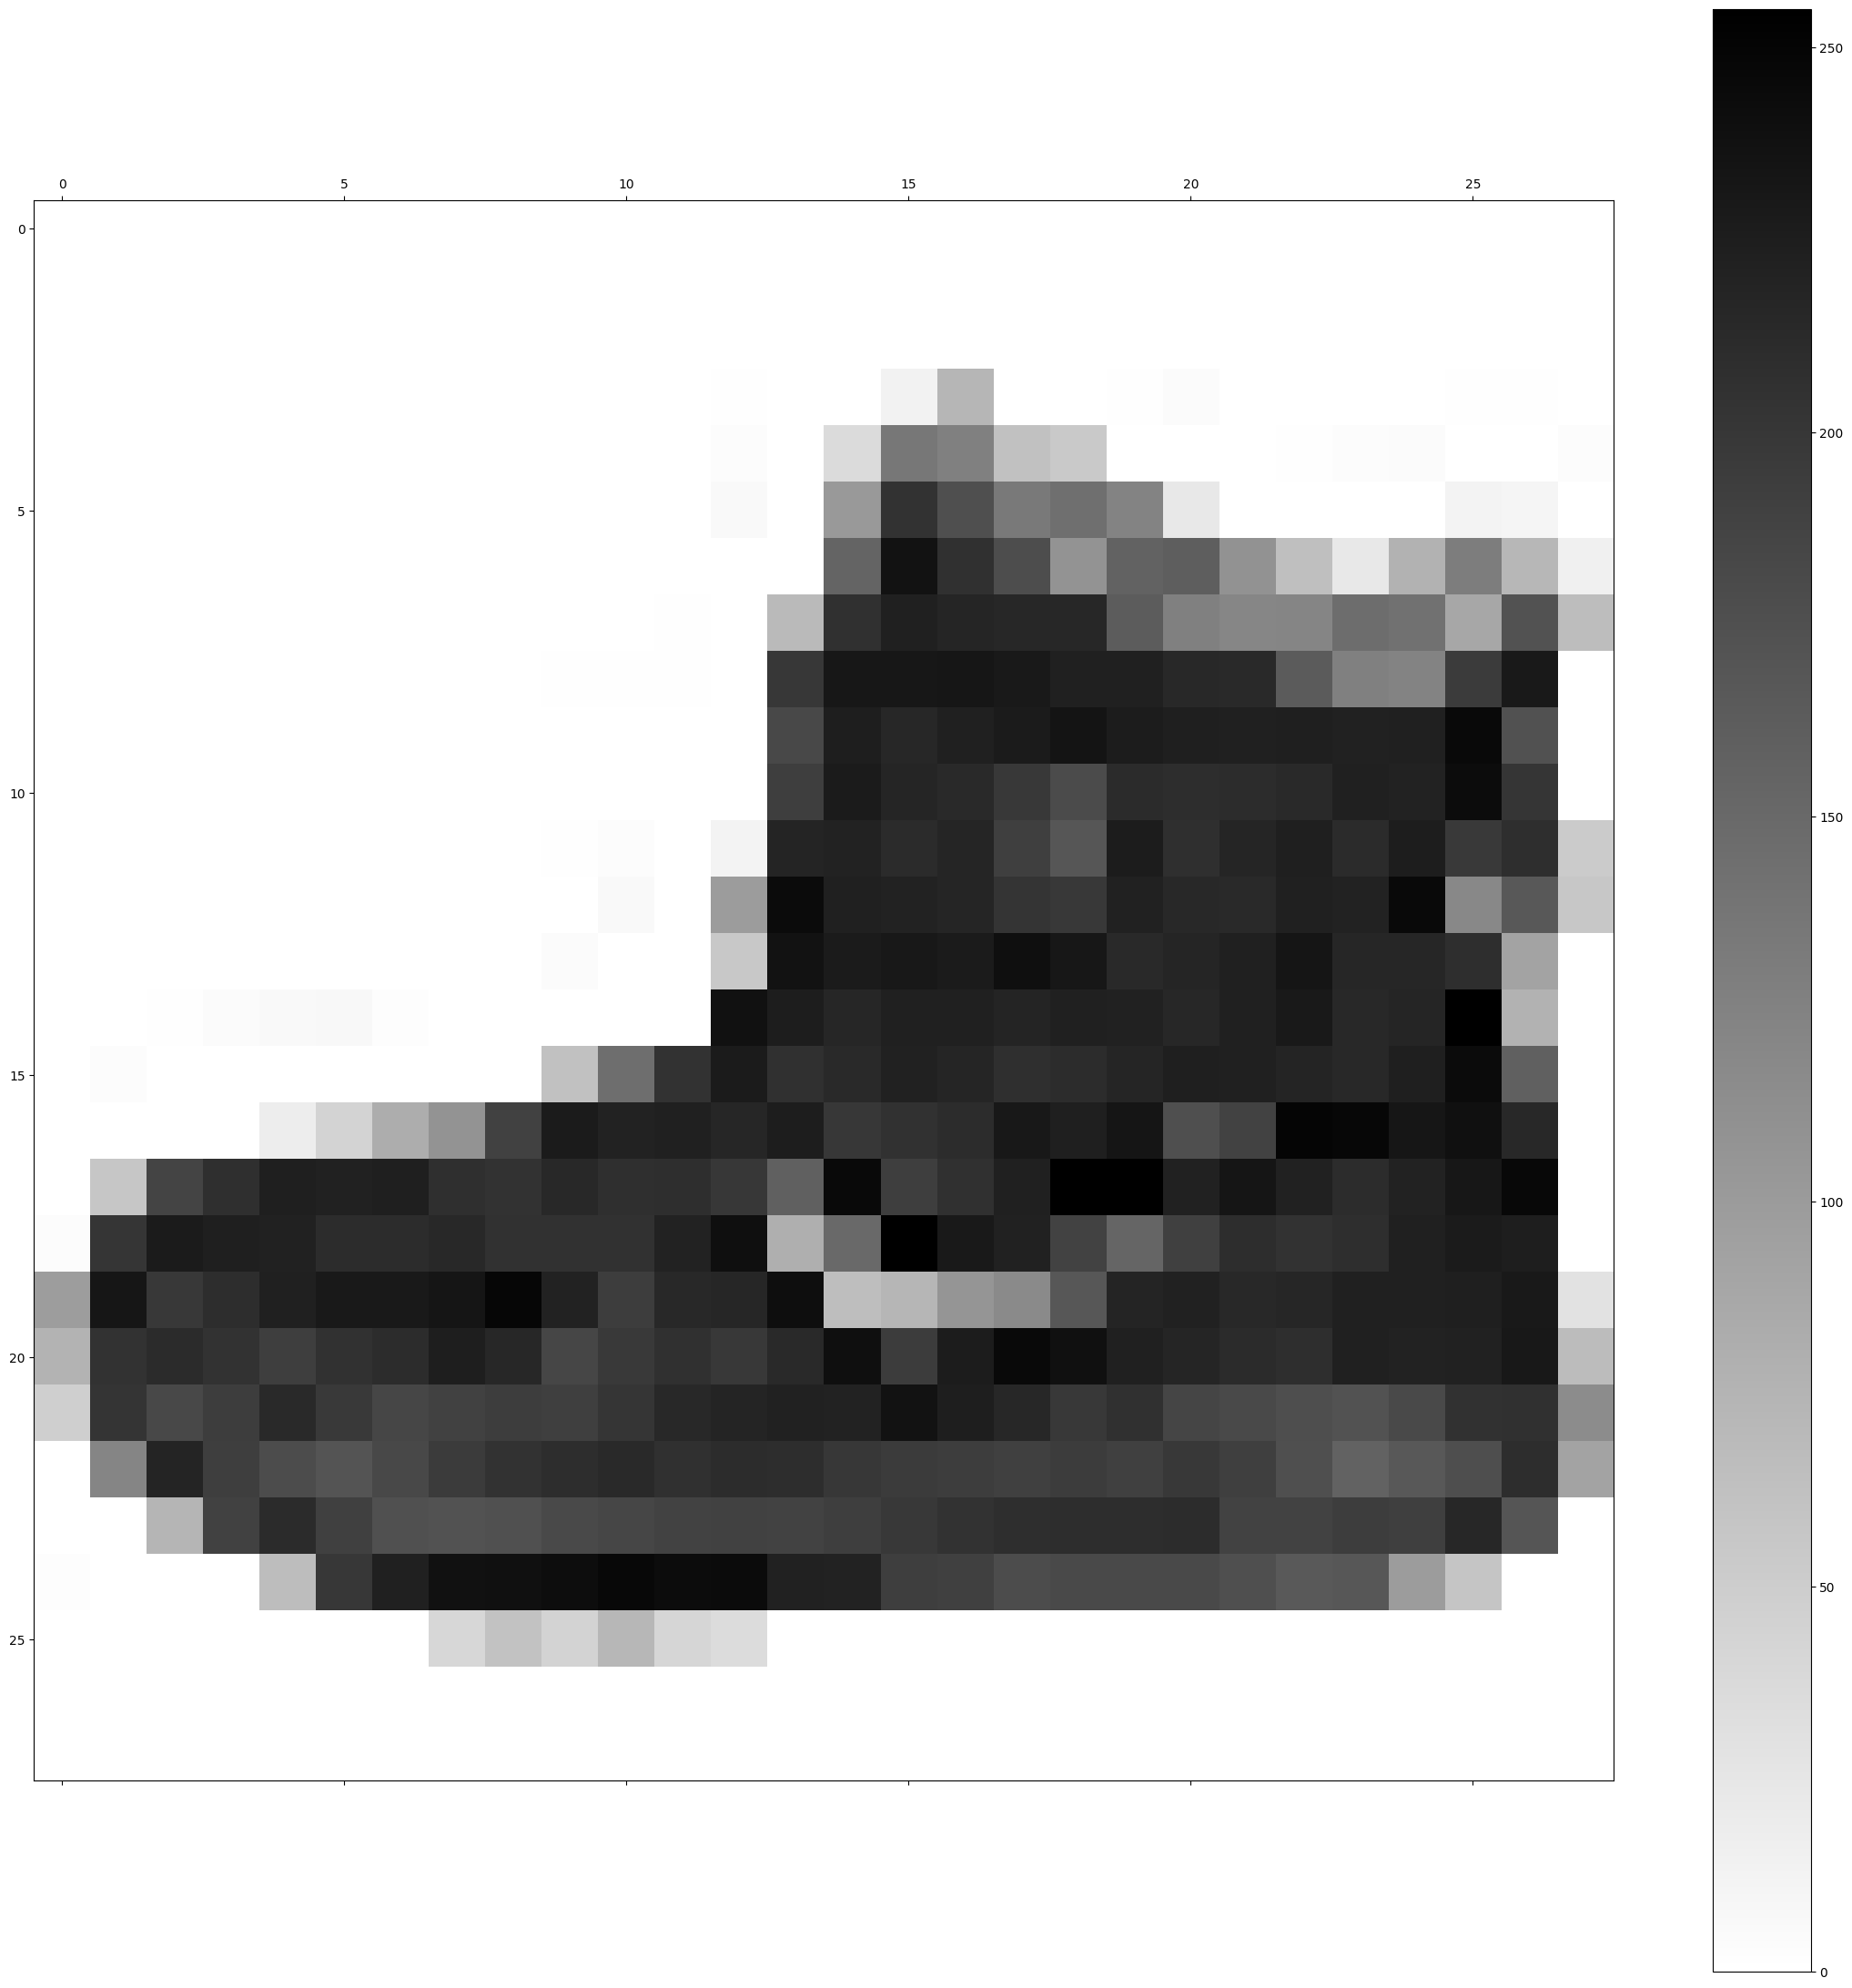

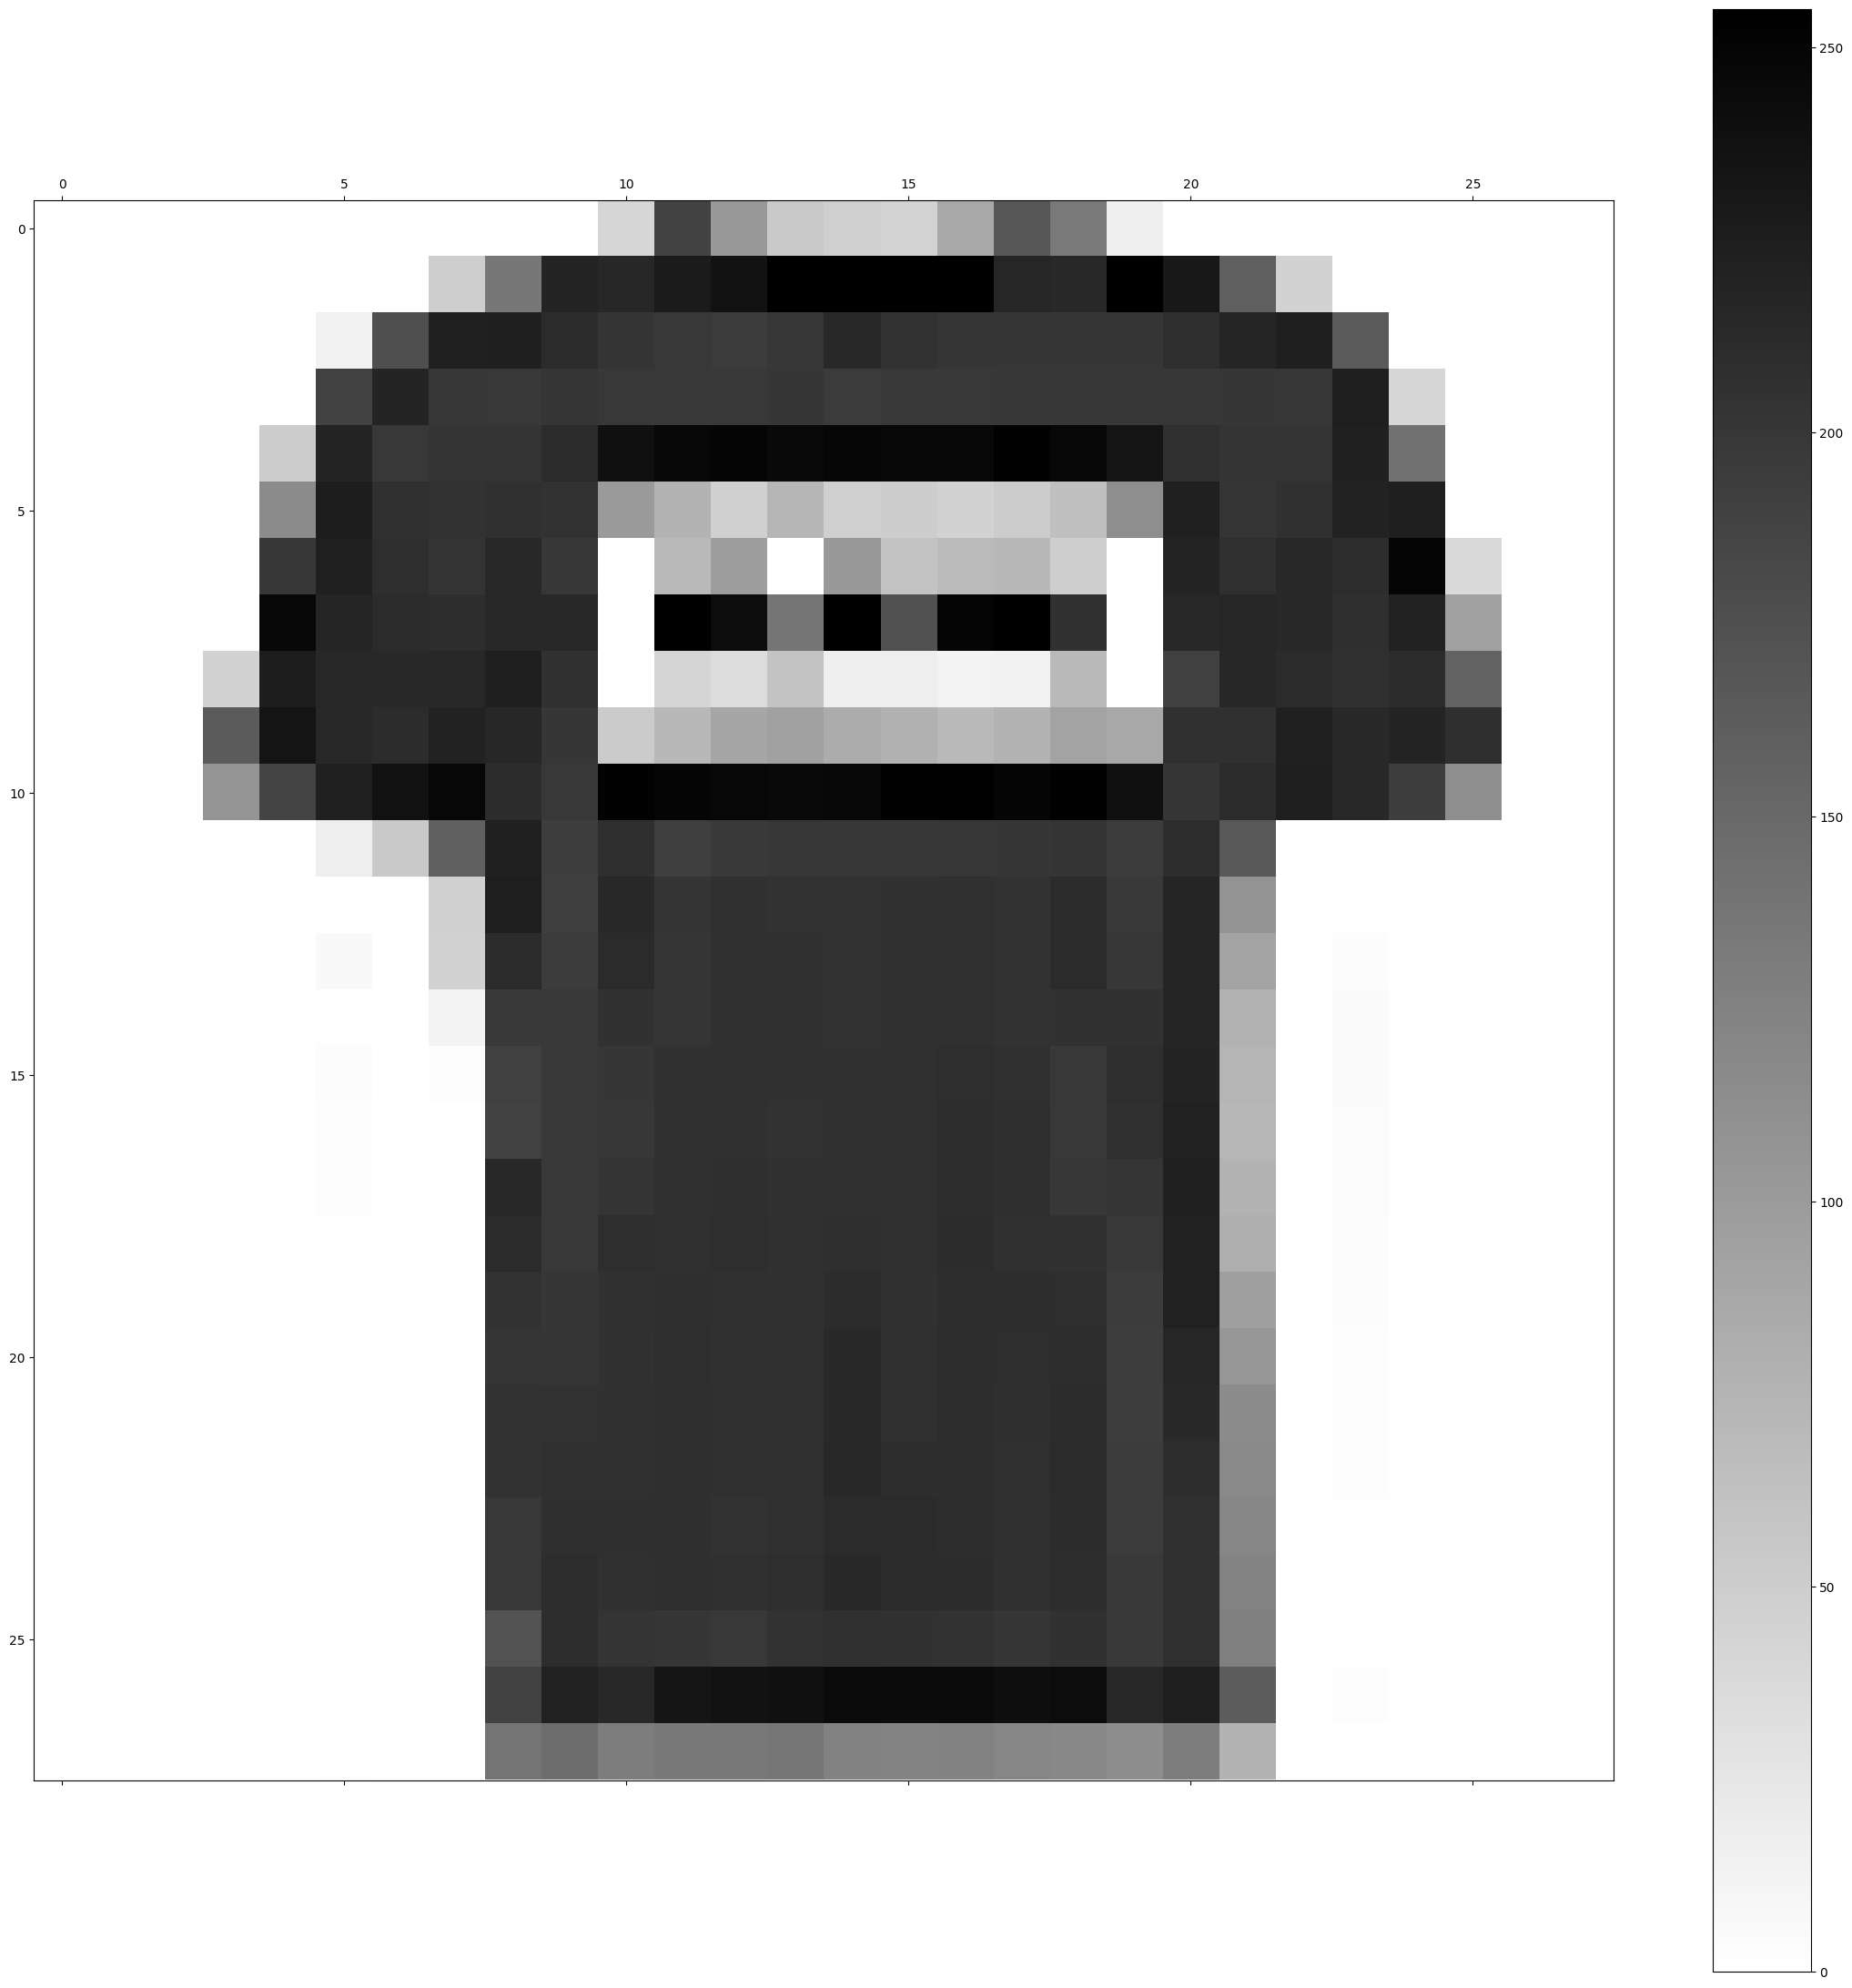

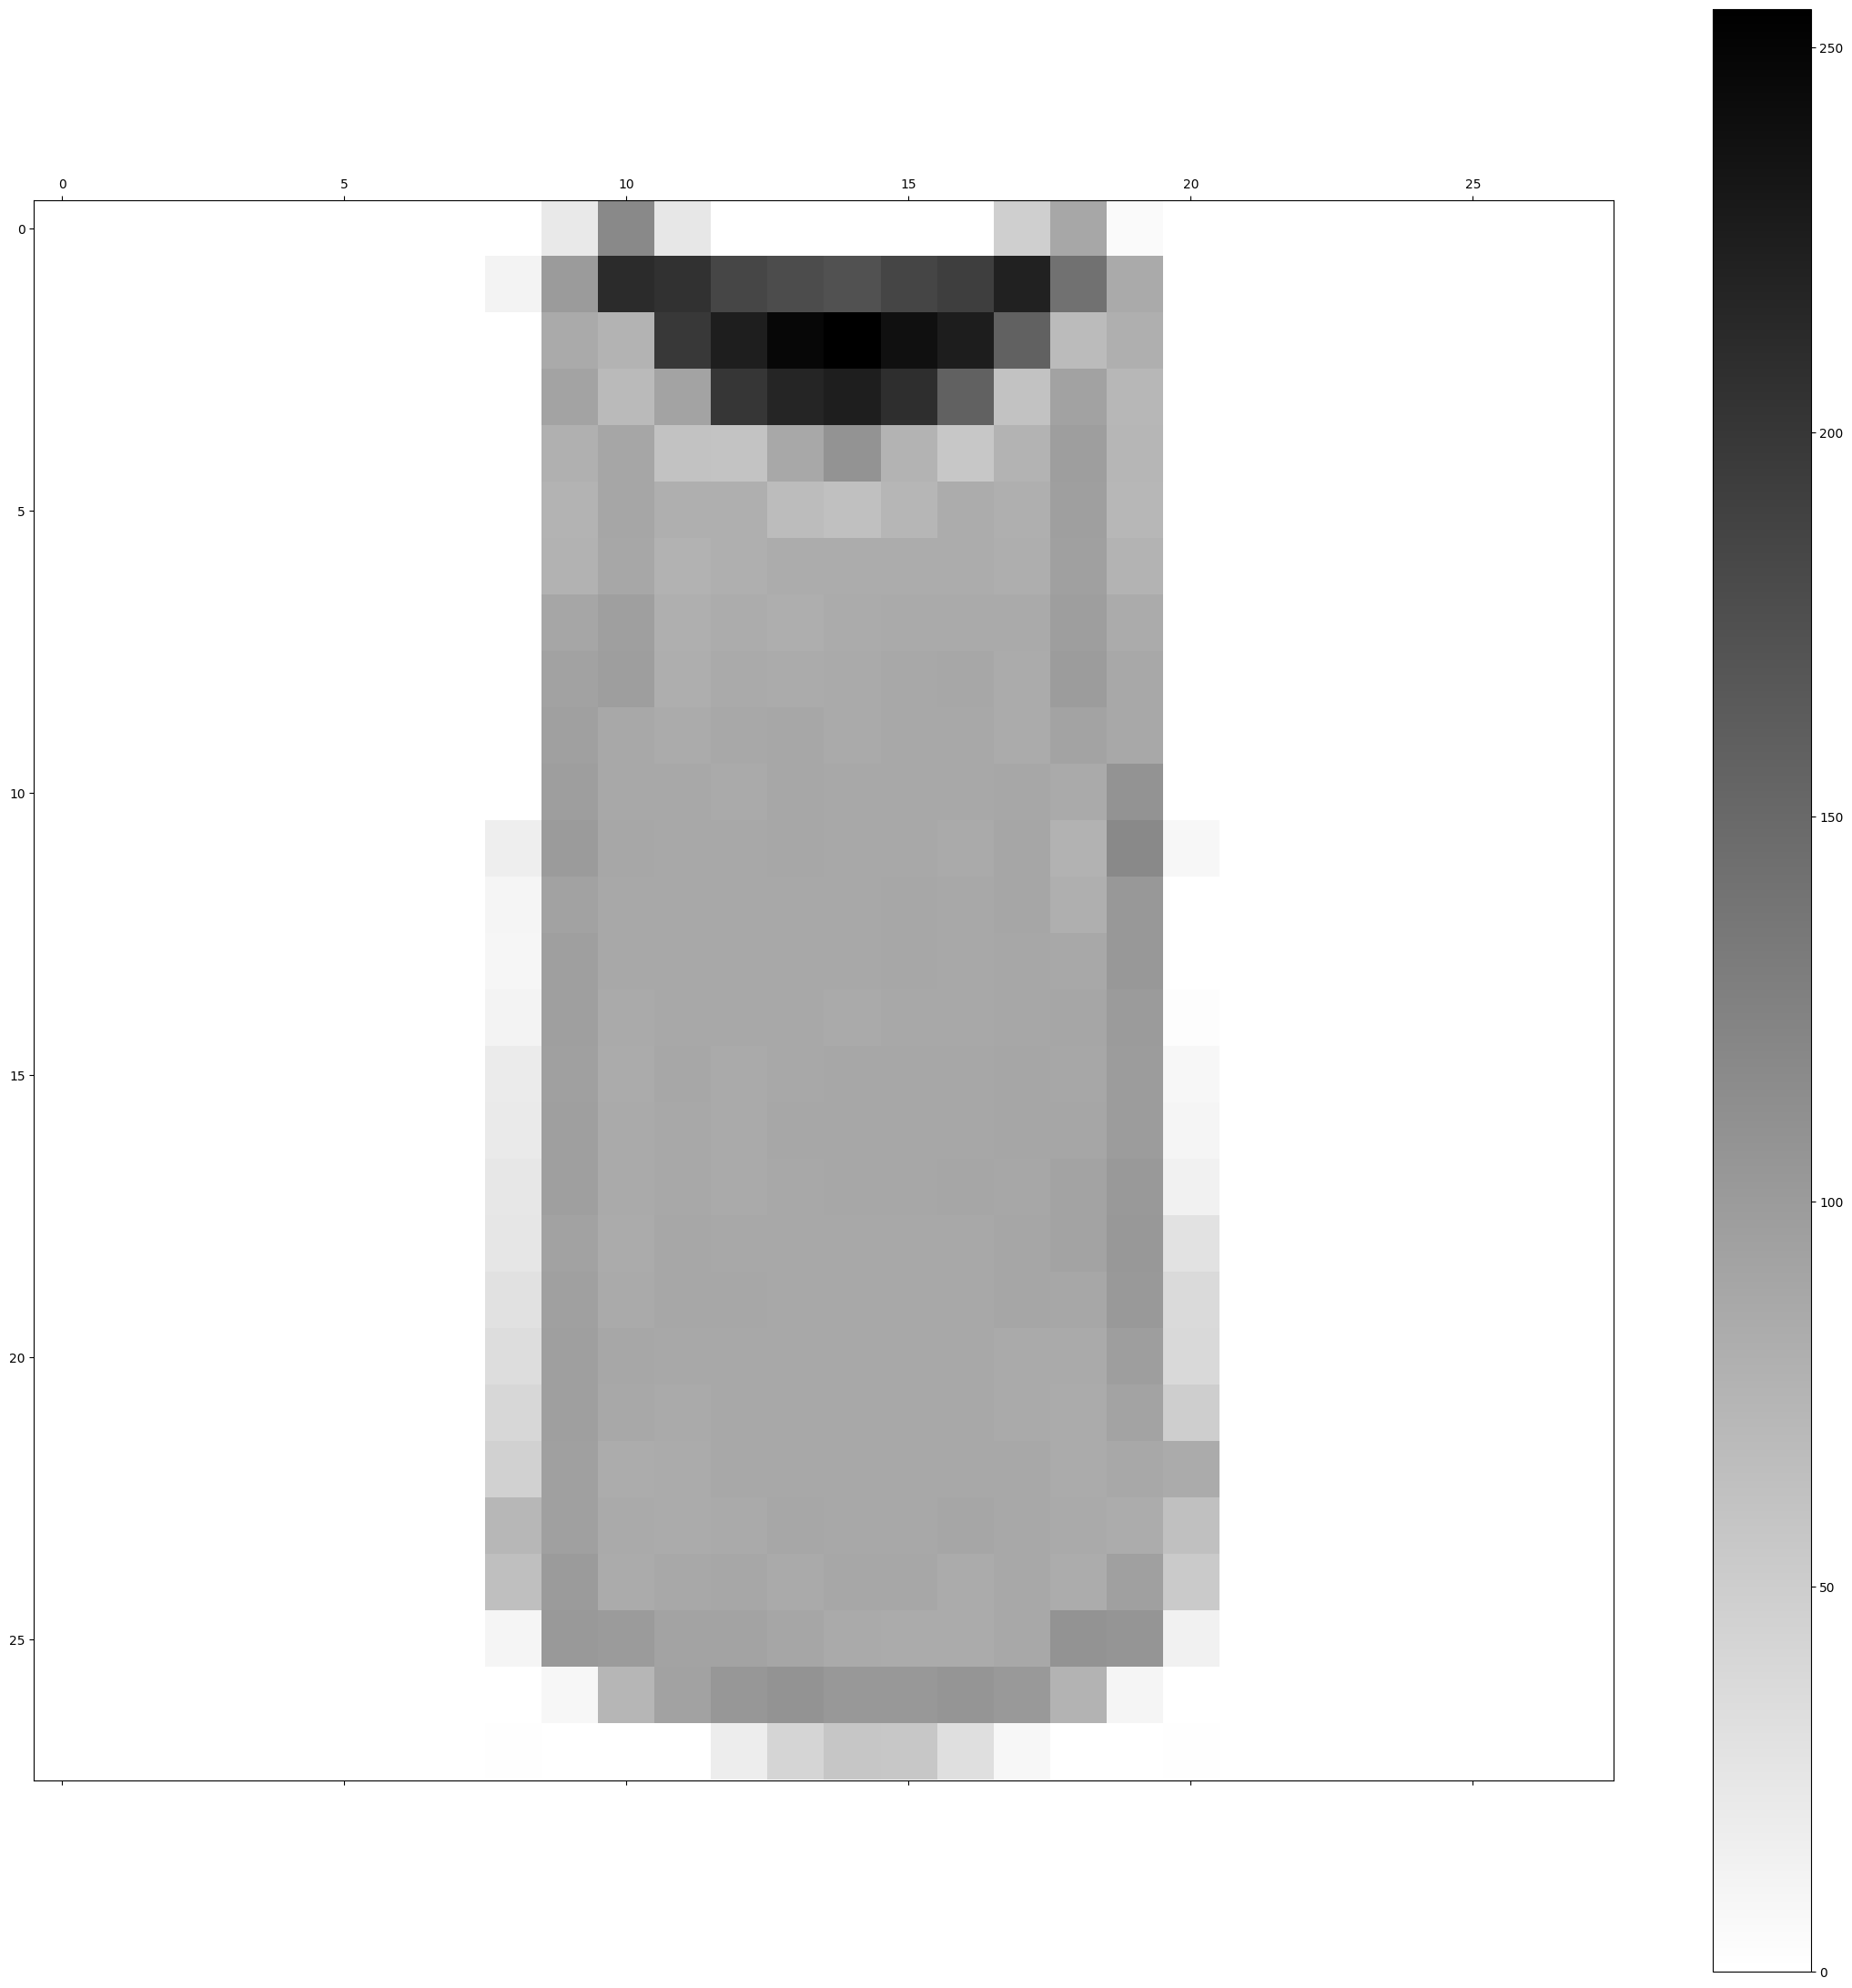

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train=np.reshape(X_train,(-1,784))
X_test=np.reshape(X_test,(-1,784))

# set id (use minimum of 1631625 and 1628189)
id = 1628189

def plot_matrix(m,target_names=None, cm=plt.cm.viridis, shape=None ):
         if shape == None:
            shape = m.shape
         fig = plt.figure(figsize=shape)
         ax = fig.add_subplot(111)
         cax = ax.matshow(np.reshape(m,shape),cmap=cm)
         if target_names is not None:
            tick_marks = np.arange(len(target_names))
            plt.xticks(tick_marks, target_names, rotation=45)
            plt.yticks(tick_marks, target_names)
         fig.colorbar(cax)

# each image is a row
# https://www.kaggle.com/datasets/zalando-research/fashionmnist
plot_matrix(X_train[0],cm=plt.cm.binary,shape=(28,28))
plot_matrix(X_train[1],cm=plt.cm.binary,shape=(28,28))
plot_matrix(X_train[2],cm=plt.cm.binary,shape=(28,28))

##Part A

In [2]:
# https://www.geeksforgeeks.org/dsa/random-forest-classifier-using-scikit-learn/
# https://www.geeksforgeeks.org/machine-learning/oob-errors-for-random-forests-in-scikit-learn/
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
import sklearn

def grid_search(CLF, X_train, y_train, n_estimators=30):
  # https://stackoverflow.com/questions/67733506/display-all-parameters-of-an-estimator-including-defaults
  # displays all parameters of classifer
  sklearn.set_config(print_changed_only=False)
  # list to hold classifiers + relevant info
  oob_scores = []
  # for all combinations of max_depth + max_features:
  for max_features in [4,12,'sqrt']:
    for max_depth in [4,12,None]:
      # initialise the classifier, setting the oob_score and the bootstrap flag
      # set random_state to id, set max_depth, max_features, and n_estimators
      # and n_jobs=-1 for some multi-core processing
      clf = CLF(random_state=id,
                n_jobs=-1,
                max_features=max_features,
                max_depth=max_depth,
                n_estimators=n_estimators,
                oob_score=True,
                bootstrap=True)
      # train the classifier using the train data
      clf.fit(X_train,y_train)
      # retrieve the oob score
      oob_score = clf.oob_score_
      # print and store max_depth, max_features, and oob score
      print(f'max_depth: {max_depth}, max_features: {max_features}, oob_score: {oob_score}')
      oob_scores.append([max_depth, max_features, oob_score, clf])
  # return the highest oob score and the respective max_depth and max_features values
  # https://stackoverflow.com/questions/18296755/python-max-function-using-key-and-lambda-expression
  return max(oob_scores, key = lambda x: x[2])

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# getting RandomForrestClassifier with highest oob score (n_estimators = 30)
max_randForest = grid_search(RandomForestClassifier, X_train, y_train)
print(f'{max_randForest}\n')

# getting RandomForrestClassifier with highest oob score (n_estimators = 30)
max_extraTrees = grid_search(ExtraTreesClassifier, X_train, y_train)
print(f'{max_extraTrees}\n')

# getting RandomForrestClassifier with highest oob score (n_estimators = 90)
max_extraTrees_90 = grid_search(ExtraTreesClassifier, X_train, y_train,n_estimators=90)
print(f'{max_extraTrees_90}\n')

# list of best performing classifiers
optimal_classifiers =[max_randForest[3], max_extraTrees[3], max_extraTrees_90[3]]

max_depth: 4, max_features: 4, oob_score: 0.7181
max_depth: 12, max_features: 4, oob_score: 0.8297
max_depth: None, max_features: 4, oob_score: 0.8428166666666667
max_depth: 4, max_features: 12, oob_score: 0.7400666666666667
max_depth: 12, max_features: 12, oob_score: 0.8504
max_depth: None, max_features: 12, oob_score: 0.8580333333333333
max_depth: 4, max_features: sqrt, oob_score: 0.7348
max_depth: 12, max_features: sqrt, oob_score: 0.8560833333333333
max_depth: None, max_features: sqrt, oob_score: 0.8617
[None, 'sqrt', 0.8617, RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=30, n_jobs=-1,
                       oob_score=Tru



RandomForestClassifier Accuracy: 0.8706 (n_estimators = 30)



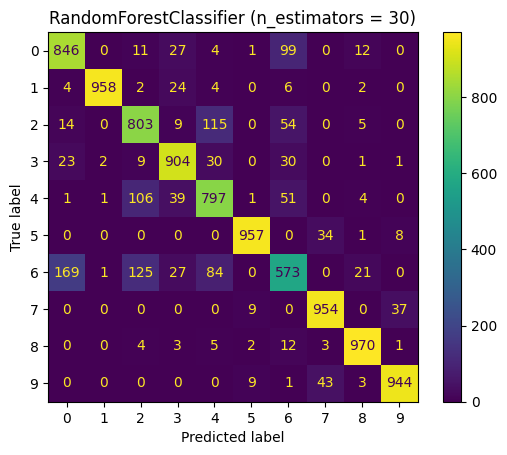

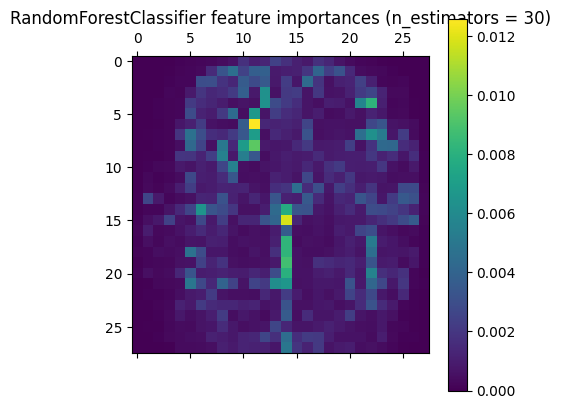



ExtraTreesClassifier Accuracy: 0.8627 (n_estimators = 30)



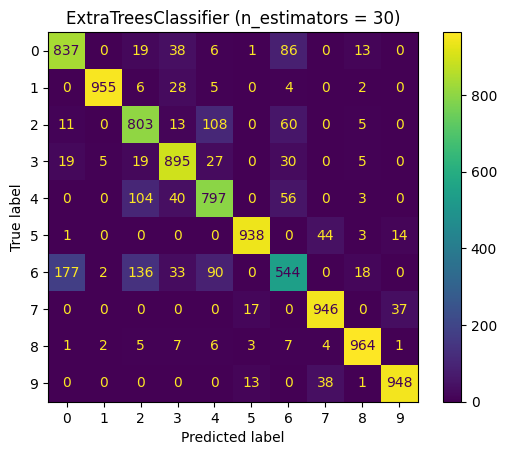

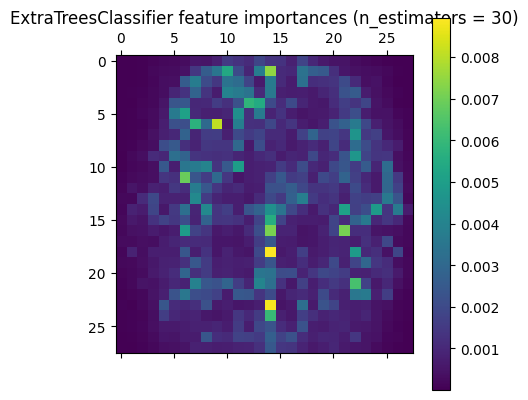



ExtraTreesClassifier Accuracy: 0.8678 (n_estimators = 90)



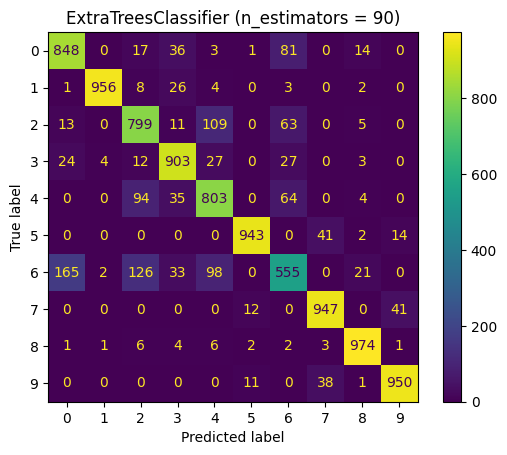

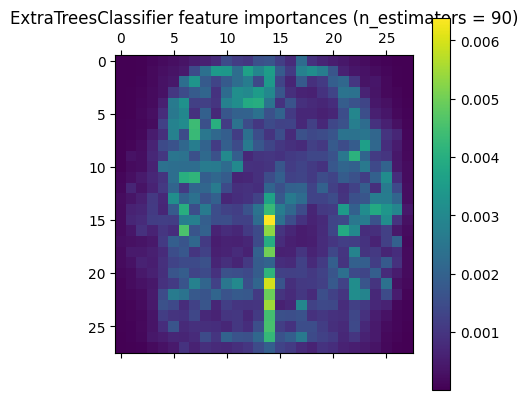

In [4]:
# https://matplotlib.org/stable/gallery/images_contours_and_fields/matshow.html#sphx-glr-gallery-images-contours-and-fields-matshow-py
# https://www.datacamp.com/tutorial/random-forests-classifier-python
# https://www.geeksforgeeks.org/machine-learning/feature-importance-with-random-forests/
# https://stackoverflow.com/questions/54049587/print-estimator-name-in-sklearn
# https://stackoverflow.com/questions/37235777/how-can-i-see-the-scale-bar-in-matshow
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import numpy as np

def show_metrics(CLF, X_train,y_train,X_test,y_test):
  # fit model to training data
  CLF.fit(X_train,y_train)

  # get predictions
  y_pred = CLF.predict(X_test)

  # get accuracy and print
  CLF_accuracy = accuracy_score(y_test, y_pred)
  print(f'\n\n{CLF.__class__.__name__} Accuracy: {CLF_accuracy} (n_estimators = {CLF.n_estimators})\n')

  # create and display confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  # display confusion matrix
  disp_cmRF = ConfusionMatrixDisplay(cm)
  disp_cmRF.plot()
  plt.title(f'{CLF.__class__.__name__} (n_estimators = {CLF.n_estimators})')
  plt.show()

  # get feature importances, reshape to 28x28 matrix and show results
  feature_importances = CLF.feature_importances_
  plt.matshow(np.reshape(feature_importances, (28,28)))
  plt.title(f'{CLF.__class__.__name__} feature importances (n_estimators = {CLF.n_estimators})')
  plt.colorbar()
  plt.show()

for clf in optimal_classifiers:
  show_metrics(clf, X_train,y_train,X_test,y_test)

##Part B - AdaBoostClassifier



AdaBoostClassifier Accuracy: 0.5867



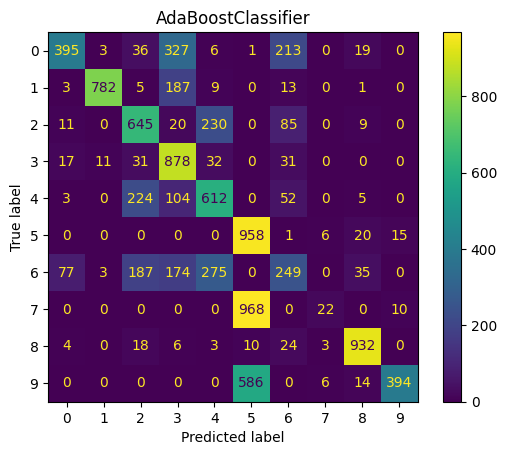

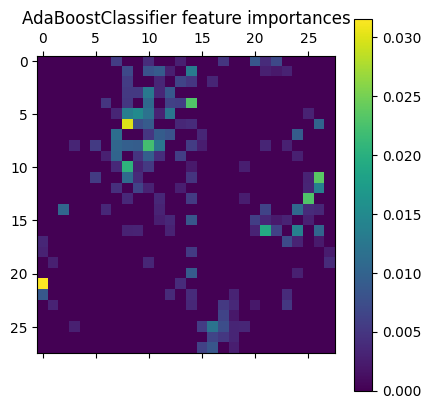

In [6]:
# https://www.datacamp.com/tutorial/adaboost-classifier-python
from sklearn.ensemble import AdaBoostClassifier

# initialise classifier
clfAB = AdaBoostClassifier(random_state=id,n_estimators=300)

# train classifier
clfAB.fit(X_train,y_train)

# obtain ensemble score at each stage during training
train_scores=list(clfAB.staged_score(X_train,y_train))

# obtain ensemble score for test set
test_scores=list(clfAB.staged_score(X_test,y_test))

# get prediction
y_pred = clfAB.predict(X_test)

# get accuracy and print
AB_accuracy = accuracy_score(y_test, y_pred)
print(f'\n\nAdaBoostClassifier Accuracy: {AB_accuracy}\n')

# create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)

# display confusion matrix
disp_cmAB = ConfusionMatrixDisplay(cm)
disp_cmAB.plot()
plt.title('AdaBoostClassifier')
plt.show()

# get feature importances, reshape to 28x28 matrix and show results
feature_importances = clfAB.feature_importances_
plt.matshow(np.reshape(feature_importances, (28,28)))
plt.title('AdaBoostClassifier feature importances')
plt.colorbar()
plt.show()

Calculate training and test loss curves. Note, adaptive boost uses an exponential loss function (see page 177 https://smlbook.org/book/sml-book-draft-latest.pdf)

In [7]:
# generate lists for training + test loss
# https://www.w3schools.com/python/python_lists_comprehension.asp
train_loss = [(1-accuracy) for accuracy in train_scores]
test_loss = [(1-accuracy) for accuracy in test_scores]

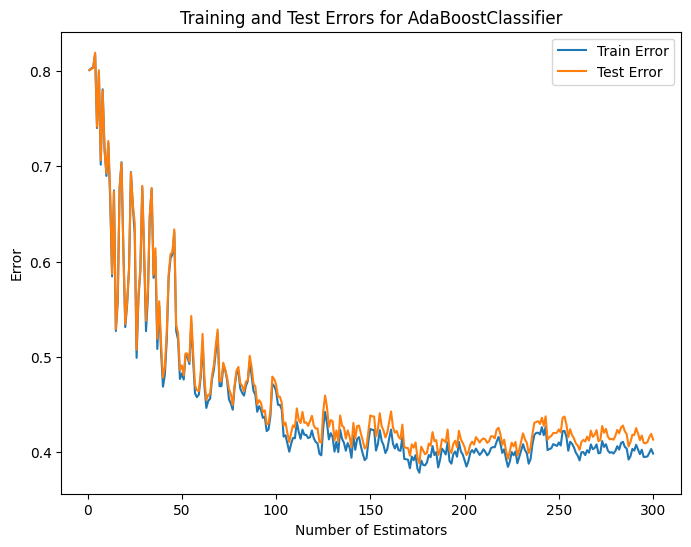

In [8]:
# Plot training and test errors against the number of estimators
plt.figure(figsize=(8, 6))
plt.plot(range(1, 301), train_loss, label='Train Error')
plt.plot(range(1, 301), test_loss, label='Test Error')
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Estimators')
plt.title('Training and Test Errors for AdaBoostClassifier')
plt.show()

##Discussion

https://www.kaggle.com/datasets/zalando-research/fashionmnist

a) **Which of the classifiers is most accurate on the test data?**

The most accurate classifier model was the RandomTreeForest with n_estimators=30, with an accuracy score of 0.8706.

b) **Look at your confusion matrix, what classes tends to be confused with each other, are they the same for the three?**

The class which gets confused the most is Class 6 - Shirt. In all three confusion matrices from Part A, it was misclassified the most. It was most often misclassified as Class 0 - T-shirt, Class 2 - Pullover, and Class 4 - Coat (again, in all three confusion matrices from Part A). The high misclassification rate is likely due to the similarity in appearance between all four clothing items.

c) **Look at the feature importance matrix in part 1, what do you notice about the feature importance matrix? Is there anything that relates that to the classes that are easily confused?**

There appears to be a region of important features in the middle of all three feature importance matrices: a vertical line running from ~12-25 (y-axis). This is line is likely important because the vertical line coincides with the gap between trouser legs in the 'trouser' class. This region being blank would therefore serve as an effective splitting criterion.

Conversely, the classes which are easily confused likely all include the 'important' features in this vertical line, making effective splitting criteria harder to implement.

**d) What do you notice about the test loss for the AdaBoostClassifier? What about the confusion matrix and the feature importance matrix?**

The test loss for the AdaBoostClassifier is fairly high, and it is similar to the training loss. It appears to have stabilised approximately after the 175th iteration, at a loss of slightly larger than 0.4.

The confusion matrix shows a large number of false positives. For example, class 9 (ankle boots) was misclassified as class 5 (sandals) 586 times, and only corrected identified 394 times. This is likely because sandals and ankle boots are similar in shape and size. As in Part A, Class 6 was misclassified at a high rate. Notably, it was misclassified as Class 2 (Pullover) 187 times, Class 3 (Dress) 174 times and Class 4 (Coat) 275 times.

**How is the feature importance of the AdaBoostClassifier different from the other classifiers, and does this mean feature importance is always informative?**

The feature importance plot for the AdaBoostClassifier appears to have far more points with very low 'importance' copmared to the feature importance plots in Part A. It lacks the vertical line in the middle of the plot seen in the feature importance plots in Part A. It seems that a feature importance plot may only be informative if the underlying model used to generate the plot is performing adequately - ie a high enough accuracy score. What is 'high enough' would determine on the application.

**e) Hypothetically, should you use the test loss to choose the optimum number of estimators for the AdaBoostClassifier? Why?**

In theory, the test dataset is 'unseen' data we are applying the trained+validated model on. It would be more correct to use the model which performed best on the validation set.

###Convert to pdf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!sudo apt-get update
!sudo apt-get install pandoc texlive-xetex texlive-fonts-recommended texlive-plain-generic -y
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Lab6-MatthewChristensen-1631625-TobyRoberts-1628189.ipynb"